<a href="https://colab.research.google.com/github/doremon020848/229352-StatisticalLearning1/blob/main/229351_LAB10_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ปฏิบัติการครั้งที่ 8

ดาวน์โหลดข้อมูลอุณหภูมิสูงสุดรายวันปี 1998-2019 จาก link ข้างล่างนี้  
https://donlapark.pages.dev/229351/data/CM_temp.csv

1. เปลี่ยนจากข้อมูลรายวันให้เป็นข้อมูลค่าเฉลี่ยรายเดือน
2. จงแบ่งข้อมูลโดยให้ Test set เป็นข้อมูลของ 24 เดือนสุดท้ายและ Training set เป็นข้อมูลก่อนหน้าทั้งหมด
3. ลองสร้างโมเดล Holt-Winters แบบต่างๆ (damped, non-damped, additive, multiplicative etc.) แล้วระบุโมเดลที่ดีที่ให้ค่า RMSE บน test set น้อยที่สุด
4. จงแสดงแผนภาพของข้อมูลจริงกับข้อมูลที่ได้ในข้อ 3

In [145]:
!wget -O CM_temp.csv https://donlapark.pages.dev/229351/data/CM_temp.csv

--2025-09-11 15:54:18--  https://donlapark.pages.dev/229351/data/CM_temp.csv
Resolving donlapark.pages.dev (donlapark.pages.dev)... 172.66.44.200, 172.66.47.56, 2606:4700:310c::ac42:2f38, ...
Connecting to donlapark.pages.dev (donlapark.pages.dev)|172.66.44.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139473 (136K) [text/csv]
Saving to: ‘CM_temp.csv’

CM_temp.csv         100%[===================>] 136.20K  --.-KB/s    in 0.02s   

2025-09-11 15:54:18 (6.32 MB/s) - ‘CM_temp.csv’ saved [139473/139473]



In [146]:
# import module ที่ต้องใช้
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime

In [147]:
# ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
def parser(dates):
  return datetime.strptime(dates, '%Y-%m-%d')

# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('CM_temp.csv', parse_dates=['Date'],
                                        index_col='Date',
                                        date_parser=parser)

data.tail()

/tmp/ipython-input-2705365328.py:8: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  data = pd.read_csv('CM_temp.csv', parse_dates=['Date'],


,MaxTemp
Date,
2019-07-27,26.2
2019-07-28,34.2
2019-07-29,34.4
2019-07-30,33.5
2019-07-31,30.7


ข้อมูลที่ได้เป็นข้อมูลรายวัน ทำการหาค่าเฉลี่ยรายเดือนด้วย method `resample`

In [148]:
data_monthly = data['MaxTemp'].resample("M").mean().astype('float32')

data_monthly.head()

/tmp/ipython-input-319469207.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data['MaxTemp'].resample("M").mean().astype('float32')


,MaxTemp
Date,
1998-01-31,31.687098
1998-02-28,33.685715
1998-03-31,37.103226
1998-04-30,37.910000
1998-05-31,35.848389


# แบ่งข้อมูลโดยให้ Test set เป็นข้อมูลของ 24 เดือนสุดท้ายและ Training set เป็นข้อมูลก่อนหน้าทั้งหมด

In [149]:
test_set = data_monthly[-24:]
train_set = data_monthly[:-24]

In [150]:
def rmse(test_set,yhat):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(test_set-yhat)))


# ลองสร้างโมเดล Holt-Winters แบบต่างๆ (damped, non-damped, additive, multiplicative etc.) แล้วระบุโมเดลที่ดีที่ให้ค่า RMSE บน test set น้อยที่สุด

additive trend + additive seasonality

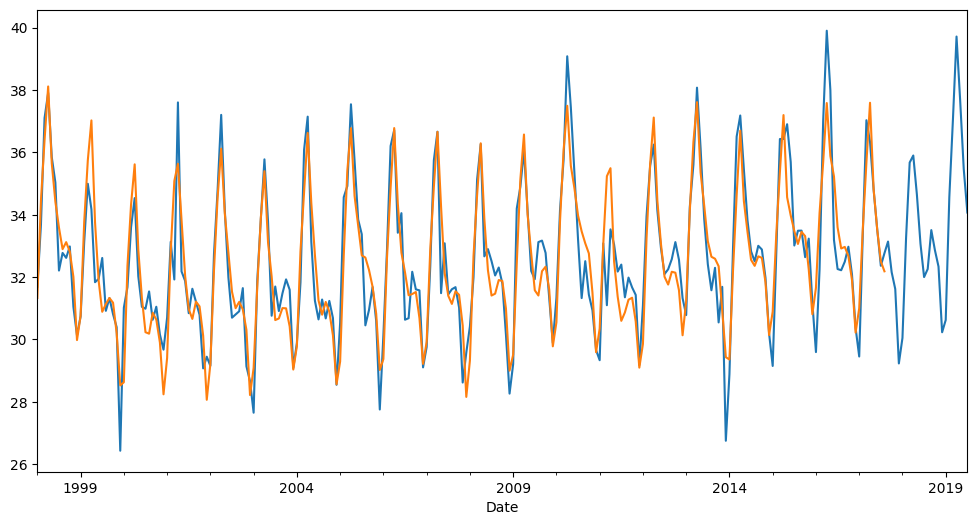

In [151]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

es = ExponentialSmoothing(train_set, trend = 'add', damped=None, seasonal='add', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('1998-01-31','2017-08-31')
a_a_n = rmse(test_set,yhat)
plt.figure(figsize=(12,6))
data_monthly.plot()
yhat.plot();

additive trend + multiplicative seasonality



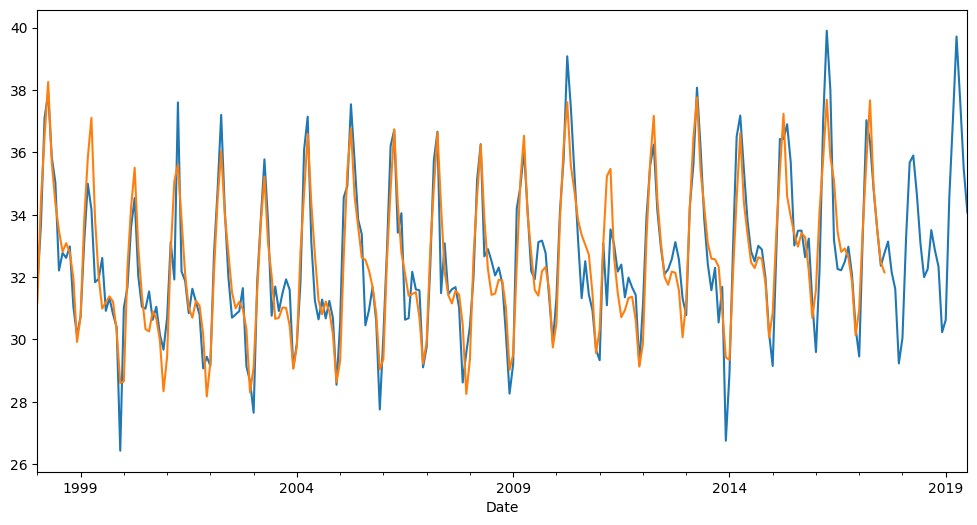

In [152]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

es = ExponentialSmoothing(train_set, trend = 'add', damped=None, seasonal='mul', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('1998-01-31','2017-08-31')
a_m_n = rmse(test_set,yhat)
plt.figure(figsize=(12,6))
data_monthly.plot()
yhat.plot();

multiplicative trend + multiplicative sesonality

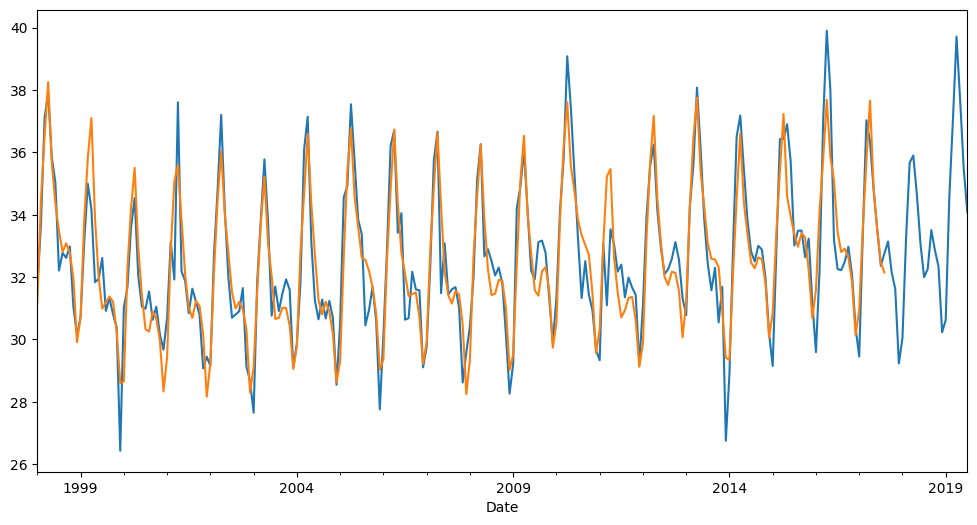

In [153]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

es = ExponentialSmoothing(train_set, trend = 'mul', damped=None, seasonal='mul', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('1998-01-31','2017-08-31')
m_m_n = rmse(test_set,yhat)
plt.figure(figsize=(12,6))
data_monthly.plot()
yhat.plot();

multiplicative trend + additive sesonality

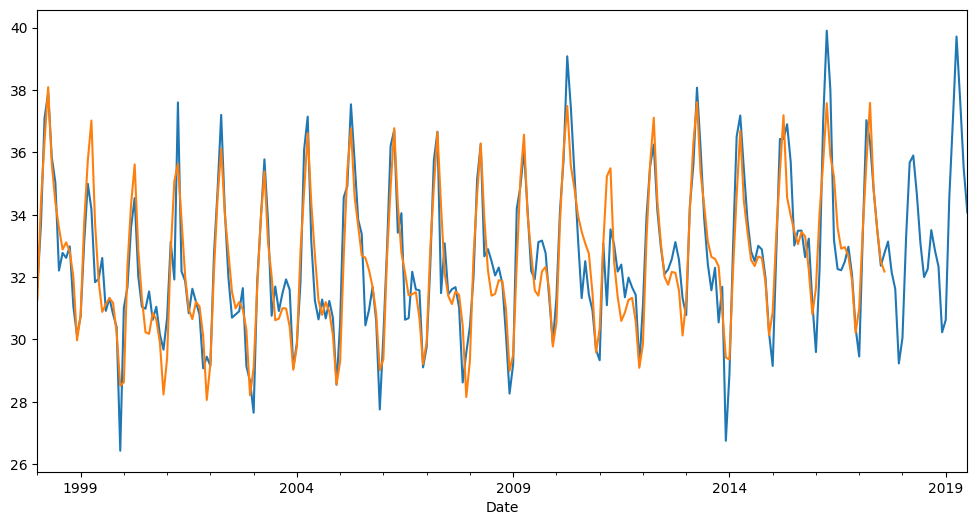

In [154]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

es = ExponentialSmoothing(train_set, trend = 'mul', damped=None, seasonal='add', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('1998-01-31','2017-08-31')
m_a_n = rmse(test_set,yhat)
plt.figure(figsize=(12,6))
data_monthly.plot()
yhat.plot();

damped trend (additive trend + additive seasonality)

/tmp/ipython-input-1810478256.py:3: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(train_set, trend = 'add', damped=True, seasonal='add', seasonal_periods=12)


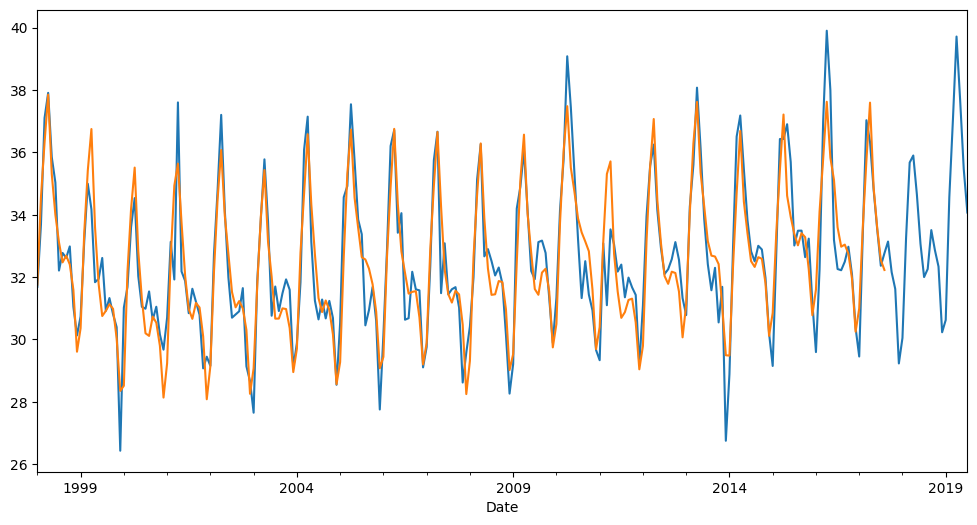

In [155]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

es = ExponentialSmoothing(train_set, trend = 'add', damped=True, seasonal='add', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('1998-01-31','2017-08-31')
a_a_d = rmse(test_set,yhat)
plt.figure(figsize=(12,6))
data_monthly.plot()
yhat.plot();

damped trend (additive trend + multiplicative seasonality)

/tmp/ipython-input-1232530775.py:3: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(train_set, trend = 'add', damped=True, seasonal='mul', seasonal_periods=12)


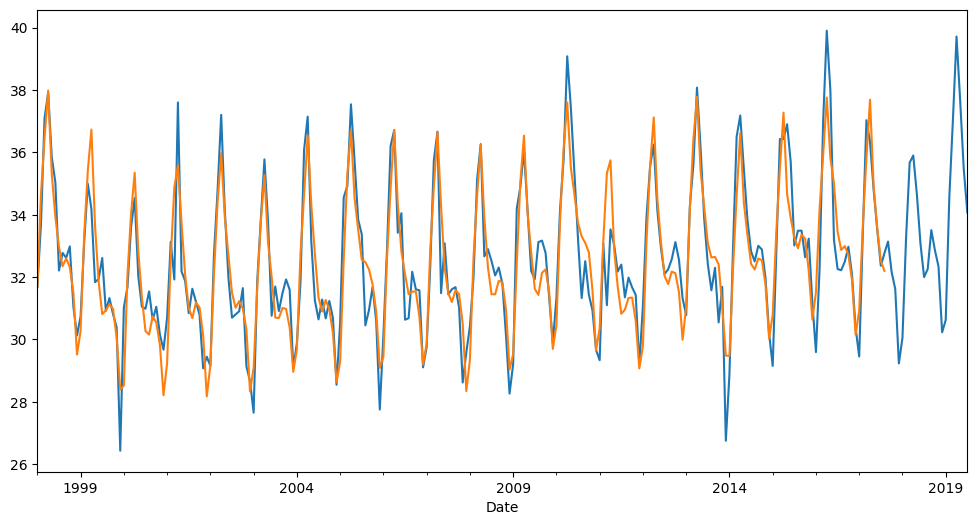

In [156]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

es = ExponentialSmoothing(train_set, trend = 'add', damped=True, seasonal='mul', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('1998-01-31','2017-08-31')
a_m_d = rmse(test_set,yhat)
plt.figure(figsize=(12,6))
data_monthly.plot()
yhat.plot();

damped trend (multiplicative trend + multiplicative seasonality)

/tmp/ipython-input-2867342669.py:3: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(train_set, trend = 'mul', damped=True, seasonal='mul', seasonal_periods=12)


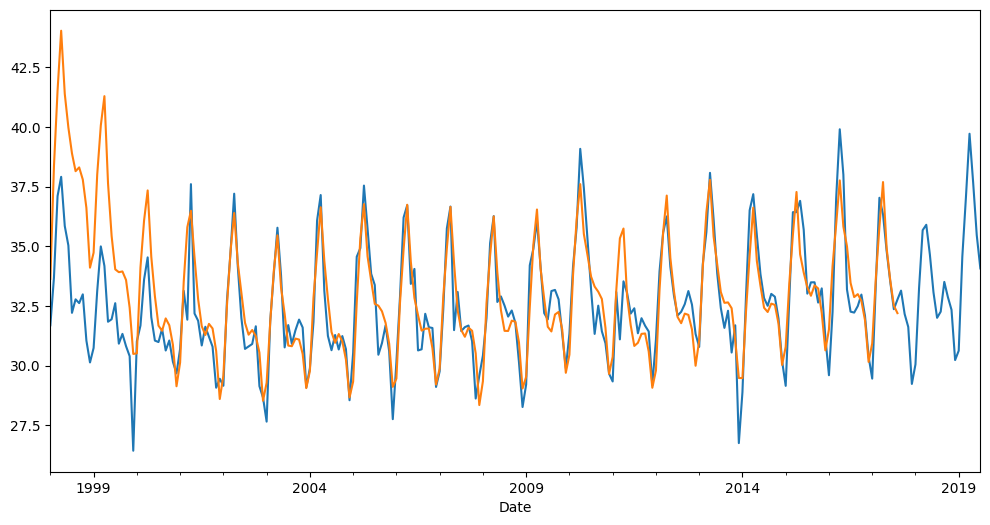

In [157]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

es = ExponentialSmoothing(train_set, trend = 'mul', damped=True, seasonal='mul', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('1998-01-31','2017-08-31')
m_m_d = rmse(test_set,yhat)
plt.figure(figsize=(12,6))
data_monthly.plot()
yhat.plot();

damped trend (multiplicative trend + additive seasonality)

/tmp/ipython-input-2061248949.py:3: FutureWarning: the 'damped' keyword is deprecated, use 'damped_trend' instead.
  es = ExponentialSmoothing(train_set, trend = 'mul', damped=True, seasonal='add', seasonal_periods=12)


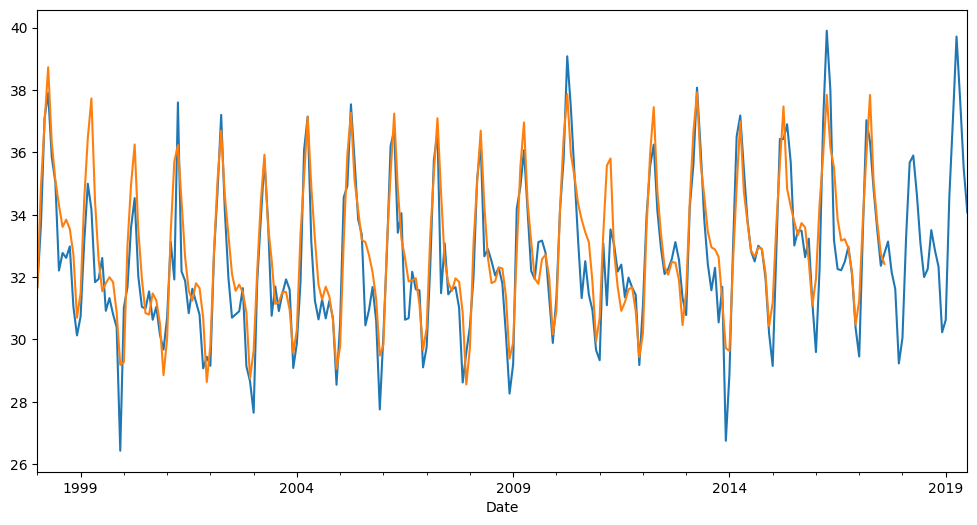

In [158]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

es = ExponentialSmoothing(train_set, trend = 'mul', damped=True, seasonal='add', seasonal_periods=12)
es_fit = es.fit(optimized=True)
yhat = es_fit.predict('1998-01-31','2017-08-31')
m_a_d = rmse(test_set,yhat)
plt.figure(figsize=(12,6))
data_monthly.plot()
yhat.plot();

summary

In [159]:
pd.DataFrame({
    'aa': [a_a_n],
    'am': [a_m_n],
    'mm': [m_m_n],
    'ma': [m_a_n],
    'aad': [a_a_d],
    'amd': [a_m_d],
    'mmd': [m_m_d],
    'mad': [m_a_d]
})

,aa,am,mm,ma,aad,amd,mmd,mad
0,0.579486,0.612955,0.618261,0.584886,0.537039,0.567566,0.568206,0.34306


# rmse = damped trend (multiplicative trend + additive seasonality) **0.340877**